<a href="https://colab.research.google.com/github/Marcosmelo999/Analise_Python_Housing.csv/blob/main/Analise_Dados_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Análise de Dados com Python** ##


**Marcos Gomes Melo**

Trabalho apresentado na conclusão da disciplina de análise de dados com Python 




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sn
import numpy as np

Este conjunto de dados contém informações sobre os preços de habitação em cidades da Califórnia, bem como várias outras informações que podem ser úteis na análise desses preços.

**Informações sobre as variáveis do DATASET Housing**

*   **median_age:** media da "idade" das casas 
*   **total_rooms:** número total de ambientes
*  **total_bedrooms**: número total de quarto
*  **population:** número total de habitantes
*  **households:** quantidade de residências
*  **median_income:** renda média atrelada a cada residência
*  **median_house_value:** media dos valores do imóveis















In [ ]:
!gdown 15bz_HvryzxzVBbiwk3k1z-PhYrn0sxOZ

Downloading...
From: https://drive.google.com/uc?id=15bz_HvryzxzVBbiwk3k1z-PhYrn0sxOZ
To: /content/housing.csv
100% 1.39M/1.39M [00:00<00:00, 8.99MB/s]


In [ ]:
caminho = '/content/drive/MyDrive/housing.csv' 

In [ ]:
df_house = pd.read_csv('housing.csv', sep = ";") #abrindo meus arquivos em uma tabela

In [ ]:
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df_house.info() # verifico os tipos de dados da minha tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df_house.isna().any()  # verifando existência de colunas com valores vazios

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
df_house.isna().sum() #vericando colunas com valores nulos

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df_house = df_house.dropna(axis=0)   # dropando pelas linhas, com o parâmetro de linha axis=0

In [ ]:
df_house.isna().sum()    #verificando a exclusão dos valores nulos

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df_house.duplicated().any()  # se alguma há redudância de dados

False

In [ ]:
df_house.describe() # verificando as estatisticas da tabela toda

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


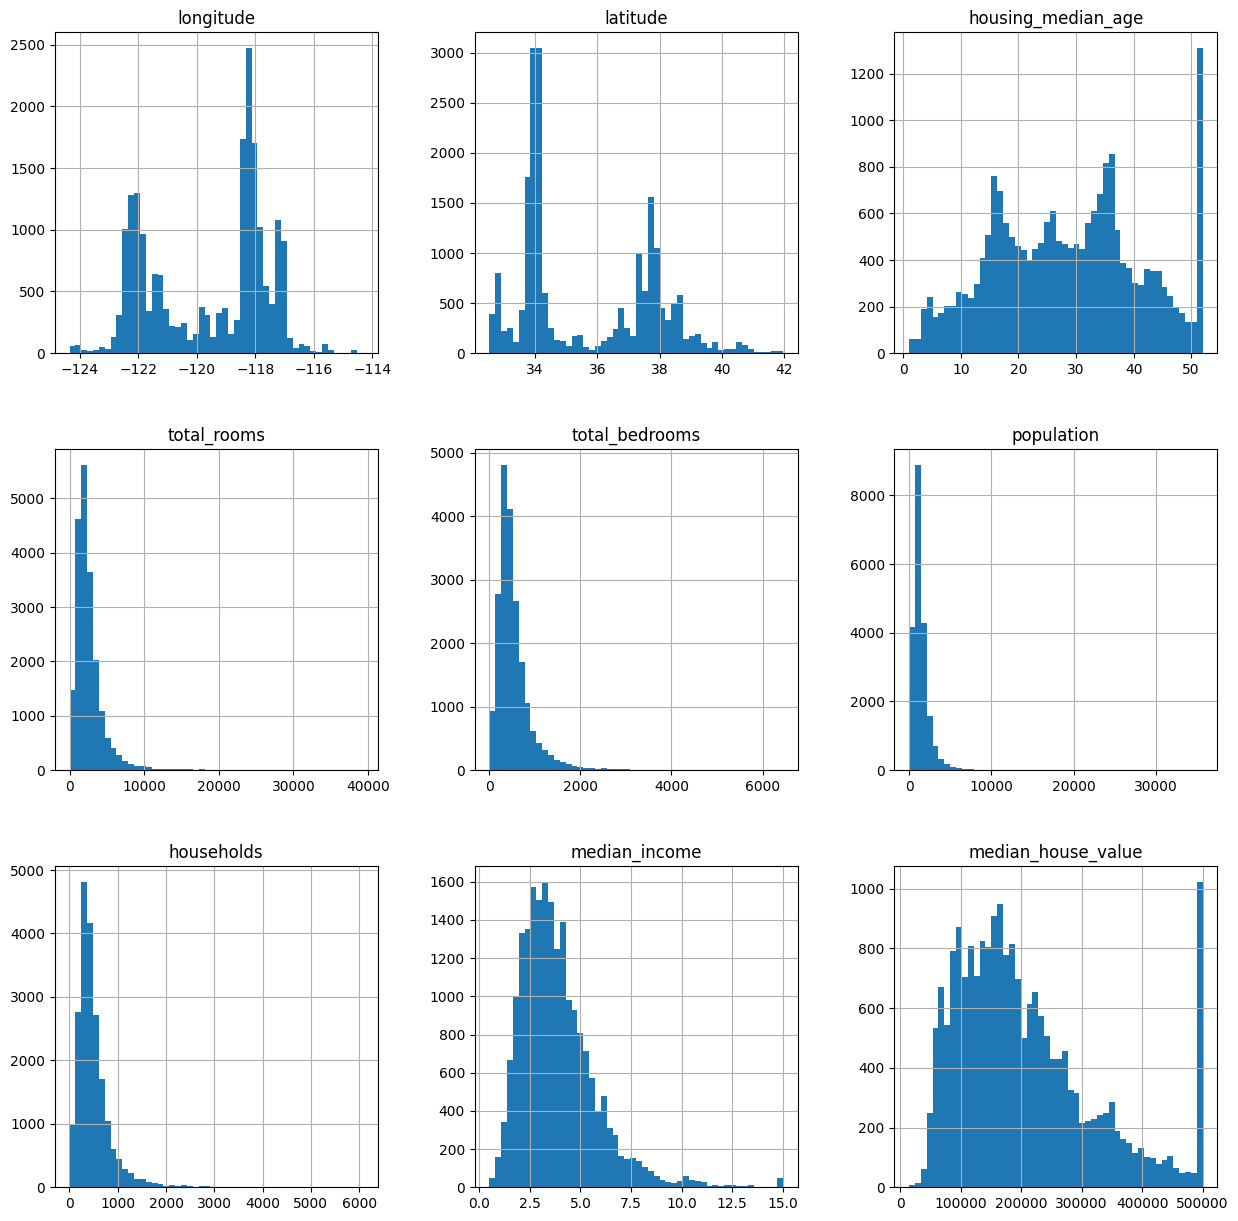

In [ ]:
df_house.hist(bins = 50, figsize=(15,15))  #Analise da distribuição dos valores do dataset e  das métricas
plt.show()

In [ ]:
df_house = df_house.loc[(df_house['housing_median_age'] < 52) & (df_house['median_house_value'] <480000)].copy() #Removendo Outilers

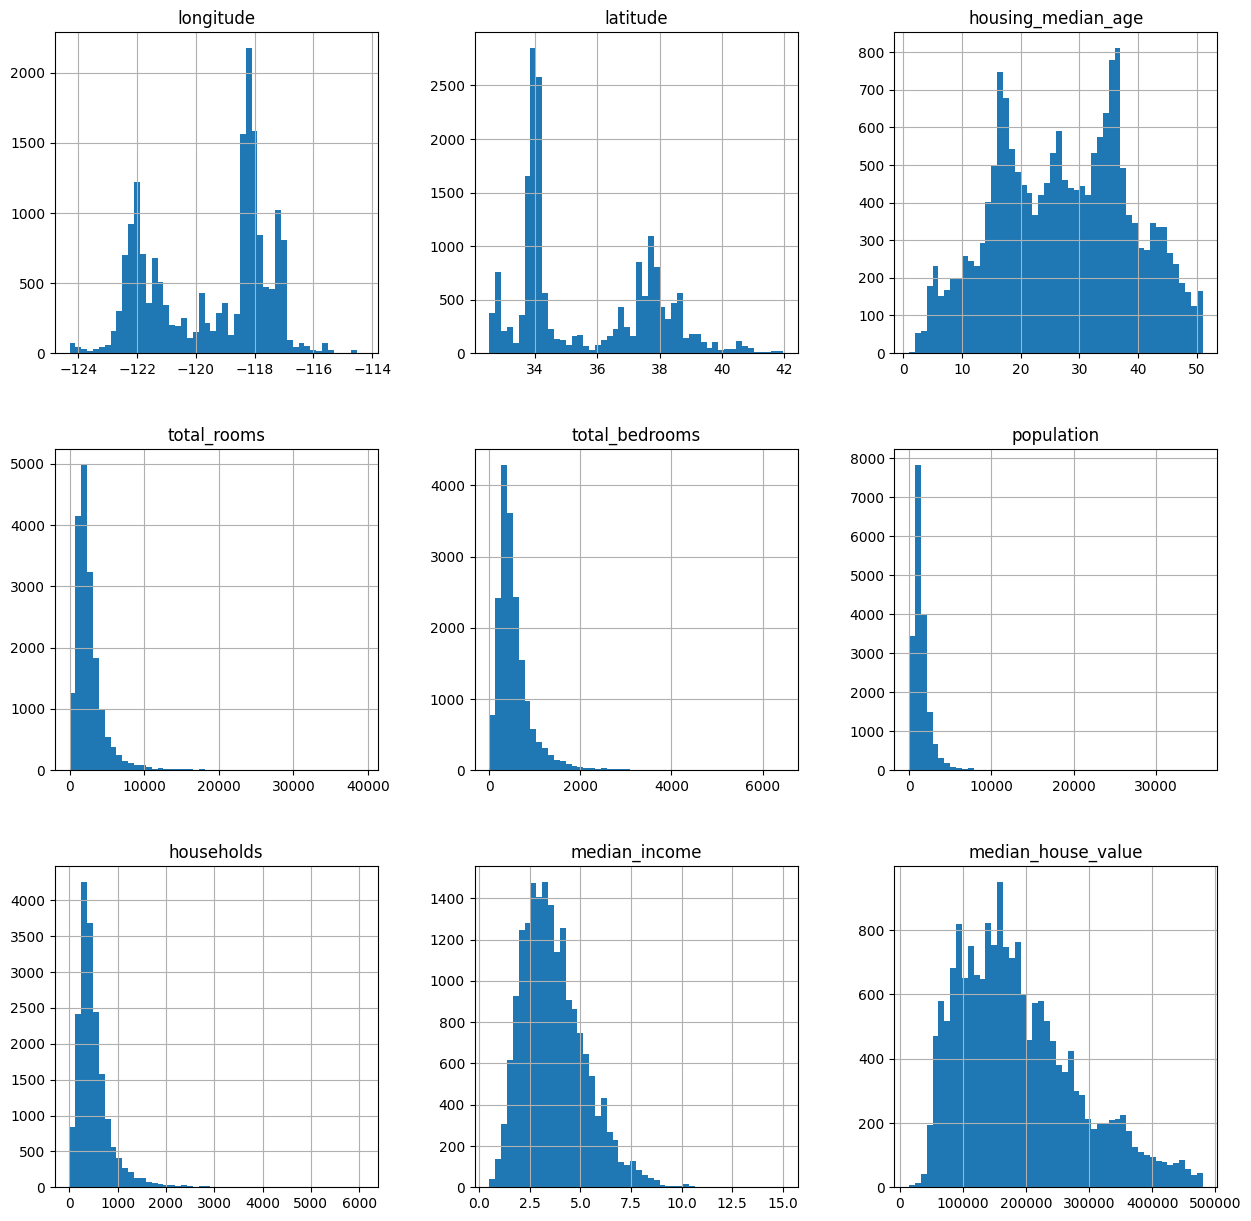

In [ ]:
df_house.hist(bins = 50, figsize=(15,15))  #Analise da distribuição dos valores do dataset e  das métricas
plt.show()

**Analisando o preço dos imóveis**

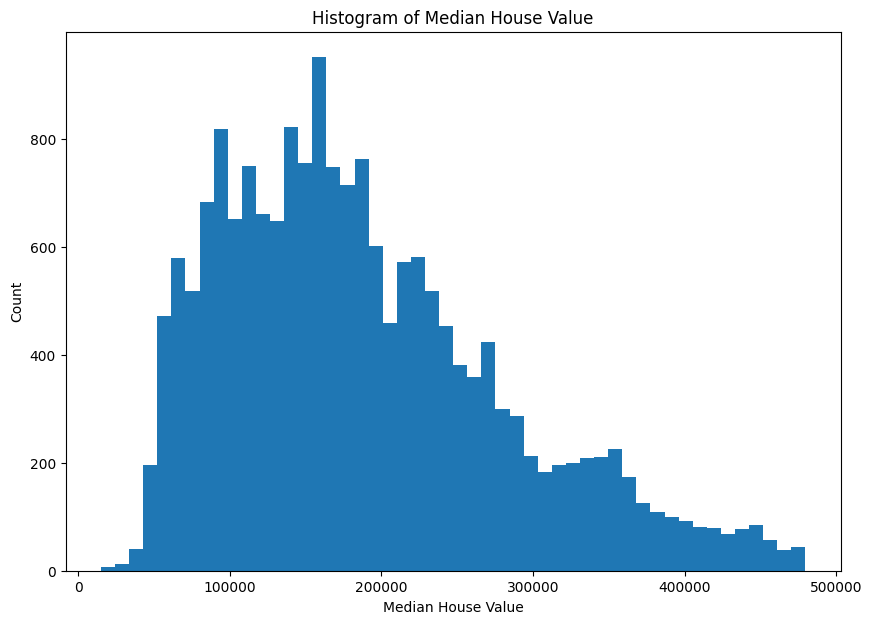

In [ ]:
df_house['median_house_value'].plot.hist(figsize=(10,7), bins=50)   #Distrbuição do preço dos imóveis
plt.xlabel('Median House Value')
plt.ylabel('Count')
plt.title('Histogram of Median House Value')
plt.show()

In [ ]:
df_house['ocean_proximity'].value_counts()

OCEAN         8184
INLAND        6285
NEAR OCEAN    2277
NEAR BAY      1540
ISLAND           2
Name: ocean_proximity, dtype: int64

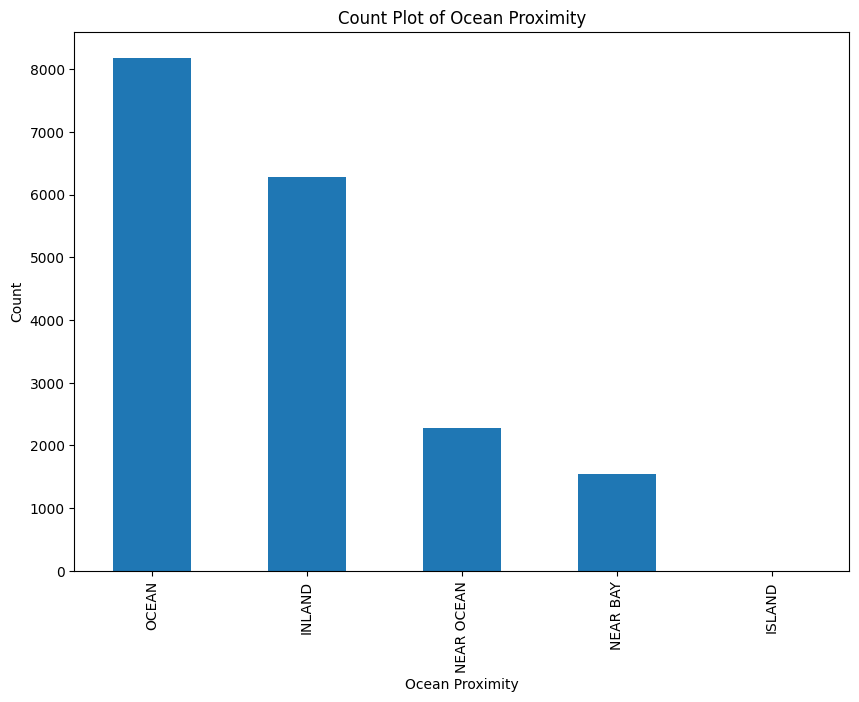

In [ ]:
plt.figure(figsize=(10,7))                      #analisar por próximidade com litoral
df_house['ocean_proximity'].value_counts().plot(kind='bar')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Count Plot of Ocean Proximity')
plt.show()

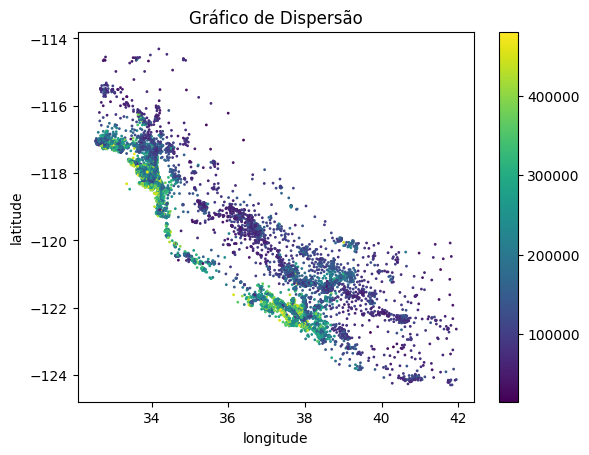

In [ ]:
plt.scatter(df_house['latitude'], df_house['longitude'], s=1, c = df_house['median_house_value'] , cmap= 'viridis')

# adicionar título e rótulos dos eixos
plt.title('Gráfico de Dispersão')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.colorbar()

# mostrar o gráfico
plt.show()

**Os imóveis mais próximos ao litoral são os de maiores valores conforme o gráfico dispersão acima.**

In [ ]:
matriz_co = df_house.corr()

<Axes: >

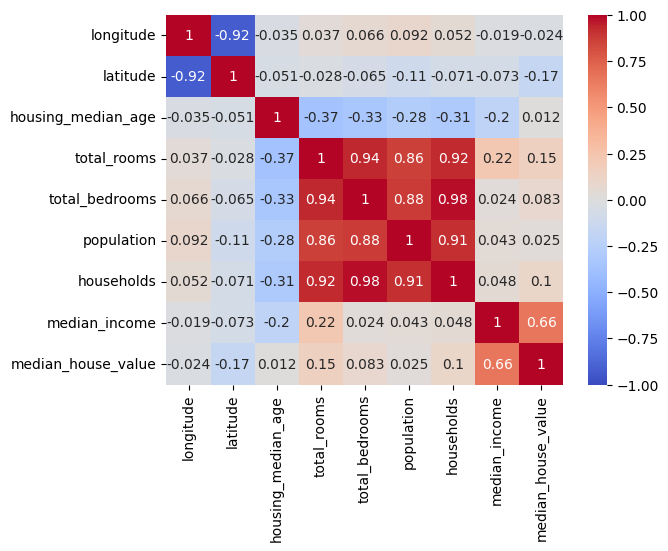

In [ ]:
sn.heatmap(matriz_co, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

**A renda média (median_income) é a váriavel de maior correlação com a variável preço média dos imóveis (median_house_value)**

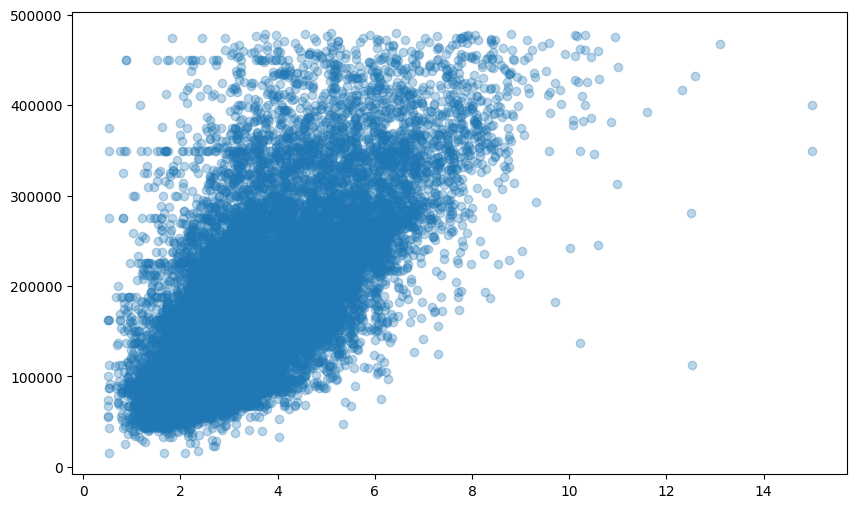

In [ ]:
plt.figure(figsize=(10,6))
g = plt.scatter(y=df_house['median_house_value'],x=df_house['median_income'],alpha=0.3)

**Transformação Logarítimica das variáveis do dataframe**

In [ ]:
#df_house['log_pop'] = df_house['population'].apply(np.log10)   #como os dados apresentam uma variação maior nas extremidades ou não linear
#df_house['log_room'] = df_house['total_rooms'].apply(np.log10)    # USAR OU NÃO ??????
#df_house['log_beds'] = df_house['total_bedrooms'].apply(np.log10)
#df_house['log_income'] = df_house['median_income'].apply(np.log10)
#df_house['log_house_value'] = df_house['median_house_value'].apply(np.log10)
#df_house['log_house_age'] = df_house['housing_median_age'].apply(np.log10)
#df_house['log_lat'] = df_house['latitude'].apply(np.log10)
#df_house['log_long'] = df_house['longitude'].apply(np.log10)

**Criando Modelo de Reegfressão Linear Simples**

In [ ]:
from scipy import stats     #código da aula04

x = df_house['median_income'].to_numpy()      #converte para arrays para armazenar os dados
y = df_house['median_house_value'].to_numpy()  #converte para arrays

resultados = stats.linregress(x, y)     #Calcular coeficientes de correlação e p-value

#criando o modelo de regressão:

theta_1 = resultados[0]
theta_0 = resultados[1]
r = resultados[2] # correlação linear
p = resultados[3] # valor p
erro_padrao = resultados[4]

print(theta_1, theta_0, r ** 2)      #hθ(x)=θ0+θ1x   # r** 2 proporção da variação total na variável dependente y explicada pela regressão linear.

39772.81718684725 41638.54406557875 0.4366788128359604


**O valor 39772.81718684725 é o coeficiente angular (theta_1) da reta de regressão, que representa o aumento esperado no preço da casa para cada aumento unitário na variável median_income.**

**O valor 41638.54406557875 é o coeficiente linear (theta_0) da reta de regressão**.


 O valor 0.4366788128359604 é o coeficiente de determinação (r ** 2) da regressão, que representa a proporção da variação total na variável median_house_value que é explicada pela variação na variável median_income. Esse valor indica que aproximadamente 44% da variação na variável median_house_value pode ser explicada pela variação em **median_income**.


**Modelo para prever o valor de median_house_value (media dos valores do imóvel)**

In [ ]:
x = 10.000  # se a median_income (renda média atrelada a cada residência) for = 10.000 
preço = theta_1 * x + theta_0
preço

439366.7159340512

**Elaboração das Métricas**

In [ ]:
df_house['income/pop'] = df_house['median_income'] / df_house['population']  #criação das métricas
df_house['house_value/income'] = df_house['median_house_value'] / df_house['median_income'] 
df_house['house_value/pop'] = df_house['median_house_value'] / df_house['population'] 
df_house['rooms/pop'] = df_house['total_rooms'] / df_house['population'] 
df_house['housing_age/pop'] = df_house['housing_median_age'] / df_house['population'] 
df_house['housing_age/house_value'] = df_house['housing_median_age'] / df_house['median_house_value']   

In [ ]:
df_house.head(1)  #dataset com as métricas

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income/pop,house_value/income,house_value/pop,rooms/pop,housing_age/pop,housing_age/house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.025855,54365.060299,1405.590062,2.732919,0.127329,0.000091


#**Filtrando São Francisco (37.773972, -122.431297)** 


In [ ]:
s0 = df_house['latitude'] > 37.2
s1 = df_house['latitude'] < 38.14
l0 = df_house['longitude'] > -122.5
l1 = df_house['longitude'] < -121.7

In [ ]:
df_san = df_house[s0 & s1 & l0 & l1]
df_san.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2683 entries, 0 to 19057
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2683 non-null   float64
 1   latitude            2683 non-null   float64
 2   housing_median_age  2683 non-null   float64
 3   total_rooms         2683 non-null   float64
 4   total_bedrooms      2683 non-null   float64
 5   population          2683 non-null   float64
 6   households          2683 non-null   float64
 7   median_income       2683 non-null   float64
 8   median_house_value  2683 non-null   float64
 9   ocean_proximity     2683 non-null   object 
dtypes: float64(9), object(1)
memory usage: 230.6+ KB


In [ ]:
df_san = df_san.drop('ocean_proximity', axis=1)

In [ ]:
matriz_san = df_san.corr()
matriz_san

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.444402,-0.430225,0.118875,0.052013,0.129666,0.060552,0.245775,-0.035497
latitude,-0.444402,1.000000,0.163611,-0.013797,-0.031455,-0.089922,-0.042372,-0.218126,-0.368617
housing_median_age,-0.430225,0.163611,1.000000,-0.386357,-0.357368,-0.353081,-0.355545,-0.344828,-0.142045
total_rooms,0.118875,-0.013797,-0.386357,1.000000,0.918728,0.910462,0.929011,0.254368,0.204523
total_bedrooms,0.052013,-0.031455,-0.357368,0.918728,1.000000,0.905956,0.995372,0.012722,0.086256
population,0.129666,-0.089922,-0.353081,0.910462,0.905956,1.000000,0.917810,0.096473,0.062924
households,0.060552,-0.042372,-0.355545,0.929011,0.995372,0.917810,1.000000,0.039346,0.103431
median_income,0.245775,-0.218126,-0.344828,0.254368,0.012722,0.096473,0.039346,1.000000,0.666638
median_house_value,-0.035497,-0.368617,-0.142045,0.204523,0.086256,0.062924,0.103431,0.666638,1.000000


<Axes: >

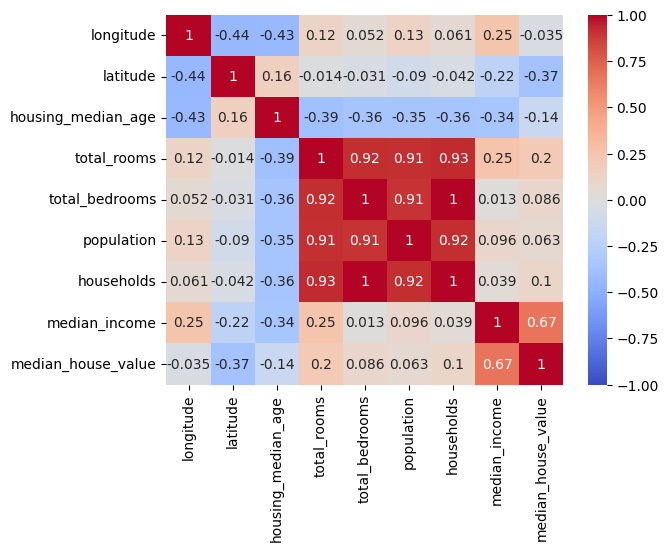

In [ ]:
sn.heatmap(matriz_san, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

**A correlação entre as variáveis MEDIAN_HOUSE_VALUE e MEDIAN_INCOME é um  valor próximo ao da correlação dos dados agregados '(0.66)', o que descarta  possibilidade do paradoxo de simpson.**

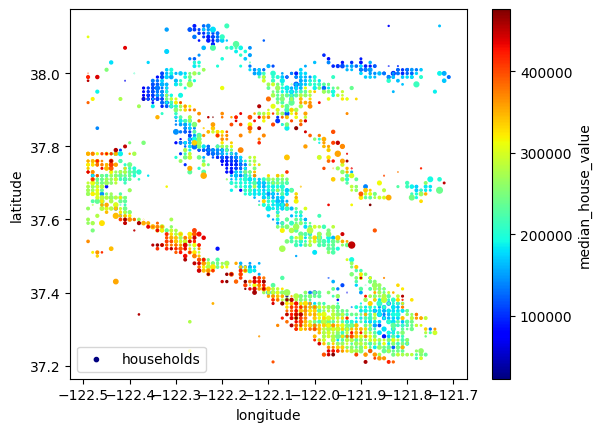

In [ ]:
sorted_housing = df_san.sort_values(by='median_house_value')

tamanho = sorted_housing['households'] / 200
rotulo = 'households'
cor = 'median_house_value'
mapa_de_cor = plt.get_cmap('jet')
barra_de_cor = True

g = sorted_housing.plot(kind = 'scatter',
                        x = 'longitude',
                        y = 'latitude',
                        alpha = 1.0,
                        s = tamanho,
                        label = rotulo,
                        c = cor,
                        cmap = mapa_de_cor,
                        colorbar = barra_de_cor)

#**Filtrando San Diego (32.715736, -117.161087 )**

In [ ]:
sd0 = df_house['latitude'] > 32.5
sd1 = df_house['latitude'] < 33
ld0 = df_house['longitude'] > -118.5
ld1 = df_house['longitude'] < -116.5

In [ ]:
df_sandiego =  df_house[sd0 & sd1 & ld0 & ld1]
df_sandiego

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14011,-117.17,32.76,45.0,3149.0,639.0,1160.0,661.0,2.7266,354200.0,NEAR OCEAN
14012,-117.17,32.75,38.0,5430.0,1176.0,2357.0,1100.0,3.6540,249000.0,NEAR OCEAN
14013,-117.18,32.74,39.0,3132.0,738.0,1200.0,690.0,2.5288,274000.0,NEAR OCEAN
14014,-117.18,32.75,36.0,2282.0,534.0,918.0,531.0,2.7222,284700.0,NEAR OCEAN
14016,-117.16,32.75,23.0,2474.0,594.0,1107.0,536.0,2.9705,245500.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15609,-116.91,32.73,8.0,4630.0,624.0,2048.0,575.0,6.4745,300300.0,OCEAN
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,259900.0,OCEAN
15611,-116.89,32.67,9.0,2652.0,393.0,1355.0,362.0,6.2578,293100.0,OCEAN
15612,-116.76,32.74,14.0,4085.0,751.0,2129.0,688.0,4.7367,214500.0,OCEAN


In [ ]:
df_sandiego = df_sandiego.drop('ocean_proximity', axis=1)

In [ ]:
matriz_sandiego = df_sandiego.corr()
matriz_sandiego

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.075582,-0.272882,0.169488,0.093762,0.212000,0.109449,0.088451,-0.302656
latitude,-0.075582,1.000000,-0.202718,0.194506,0.120661,0.034708,0.117189,0.357423,0.337777
housing_median_age,-0.272882,-0.202718,1.000000,-0.345439,-0.329812,-0.350958,-0.320903,-0.286751,-0.014805
total_rooms,0.169488,0.194506,-0.345439,1.000000,0.926668,0.901449,0.928955,0.269622,0.178874
total_bedrooms,0.093762,0.120661,-0.329812,0.926668,1.000000,0.888692,0.991801,0.006947,0.047238
population,0.212000,0.034708,-0.350958,0.901449,0.888692,1.000000,0.906242,0.057382,-0.050460
households,0.109449,0.117189,-0.320903,0.928955,0.991801,0.906242,1.000000,0.012894,0.039576
median_income,0.088451,0.357423,-0.286751,0.269622,0.006947,0.057382,0.012894,1.000000,0.618909
median_house_value,-0.302656,0.337777,-0.014805,0.178874,0.047238,-0.050460,0.039576,0.618909,1.000000


<Axes: >

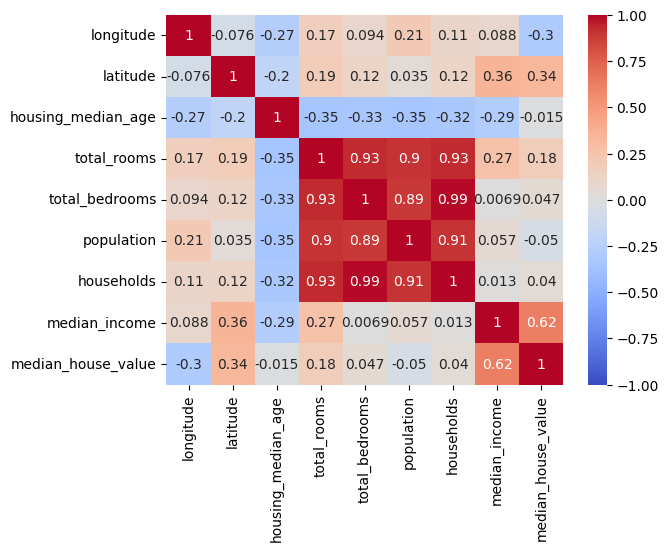

In [ ]:
sn.heatmap(matriz_sandiego, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

**A correlação entre as variáveis MEDIAN_HOUSE_VALUE e MEDIAN_INCOME é um  valor próximo ao da correlação dos dados agregados '(0.66)', o que descarta  possibilidade do paradoxo de simpson.**

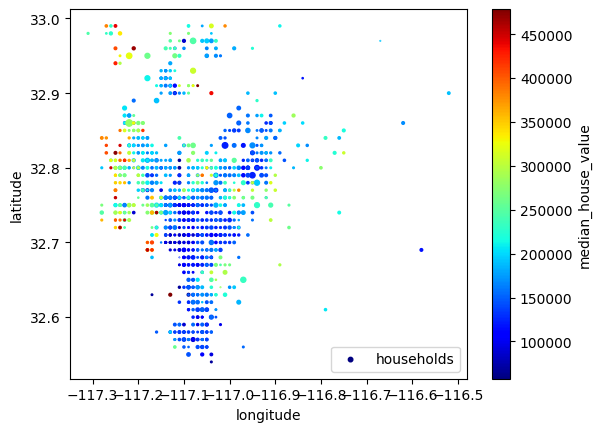

In [ ]:
sorted_housing = df_sandiego.sort_values(by='median_house_value')

tamanho = sorted_housing['households'] / 200
rotulo = 'households'
cor = 'median_house_value'
mapa_de_cor = plt.get_cmap('jet')
barra_de_cor = True

g = sorted_housing.plot(kind = 'scatter',
                        x = 'longitude',
                        y = 'latitude',
                        alpha = 1.0,
                        s = tamanho,
                        label = rotulo,
                        c = cor,
                        cmap = mapa_de_cor,
                        colorbar = barra_de_cor)